age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
class         int64
dtype: object
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
class         int64
dtype: object


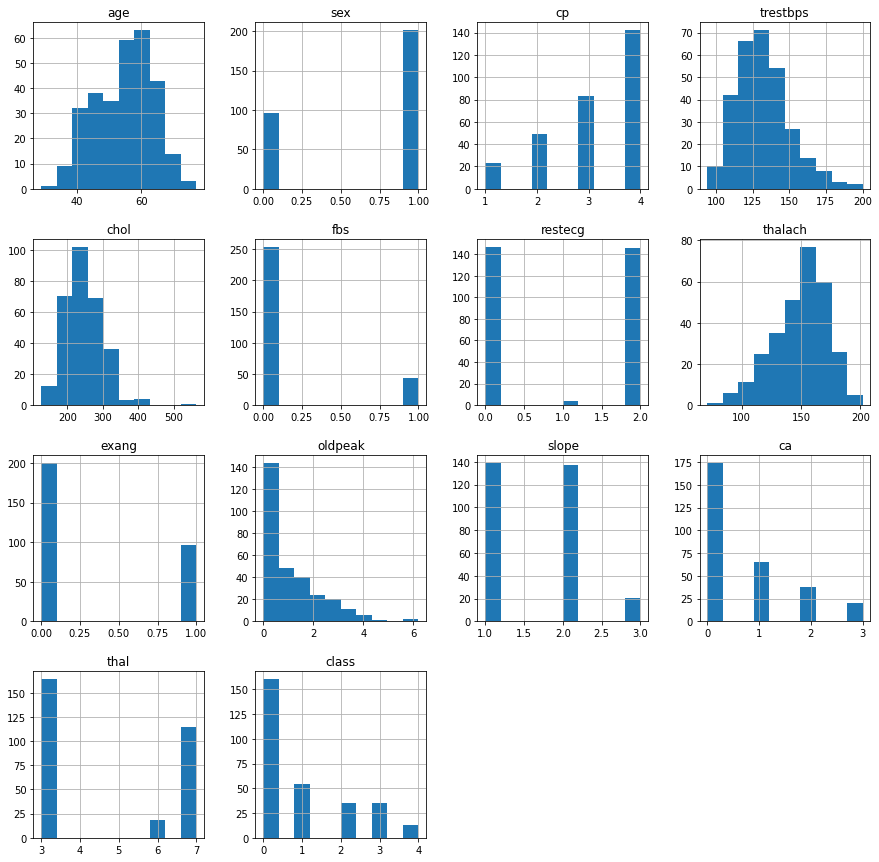

Epoch 1/60
25/30 [========================>.....] - ETA: 0s - loss: 0.6930 - accuracy: 0.5200 
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to CNN_Model-01-0.50.h5
30/30 [==============================] - 1s 11ms/step - loss: 0.6925 - accuracy: 0.5316 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 2/60
22/30 [=====================>........] - ETA: 0s - loss: 0.6918 - accuracy: 0.5284
Epoch 2: val_accuracy improved from 0.50000 to 0.51667, saving model to CNN_Model-02-0.52.h5
30/30 [==============================] - 0s 5ms/step - loss: 0.6904 - accuracy: 0.5443 - val_loss: 0.6880 - val_accuracy: 0.5167
Epoch 3/60
26/30 [=========================>....] - ETA: 0s - loss: 0.6890 - accuracy: 0.5673
Epoch 3: val_accuracy did not improve from 0.51667
30/30 [==============================] - 0s 3ms/step - loss: 0.6872 - accuracy: 0.5738 - val_loss: 0.6876 - val_accuracy: 0.5167
Epoch 4/60
27/30 [==========================>...] - ETA: 0s - loss: 0.6891 - accuracy: 0.5046
E

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, accuracy_score

# import the heart disease dataset
dataset = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

column_names =  ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','class']

# read the csv
dataset = pd.read_csv(dataset, names=column_names)

# remove missing data with "?"
df = dataset[~dataset.isin(['?'])]

#drop rows with NaN values from DataFrame
df = df.dropna(axis=0)

# checking data type of the dataframe
print (df.dtypes)

# transform data to numeric because ca and thal are object datatypes
data = df.apply(pd.to_numeric)
print(data.dtypes)
# plot histograms for each variable
data.hist(figsize = (15, 15))
plt.show()



# create X and Y datasets for training
X = data.iloc[:,0:13]
y = data.iloc[:,-1]

# changing class column to binary.
# 0 = no heart disease
# 1 = heart disease
data["class"] = np.where(data["class"] > 0, 1, data["class"])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,shuffle = True)

# create model
model = Sequential()
model.add(Dense(10, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, kernel_initializer='normal', activation='relu'))
model.add(Dense(4, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, activation='sigmoid'))

filepath="CNN_Model-{epoch:02d}-{val_accuracy:.2f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# compile model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

train_model = model.fit(X_train, y_train, epochs=60, batch_size=8, verbose = 1, validation_data=(X_test,y_test),callbacks=[callbacks_list])

plt.plot(train_model.history['accuracy'], marker='.')
plt.plot(train_model.history['val_accuracy'], marker='.')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid()
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.savefig('model_accuracy_binary.png')
plt.close()

plt.plot(train_model.history['loss'], marker='.')
plt.plot(train_model.history['val_loss'], marker='.')
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.savefig('model_loss_binary.png')
plt.close()

# Rounding the prediction if it is a binary problem
pred = np.round(model.predict(X_test))
print(pred)

for i in pred:
    if(np.max(i) > 0.5):
        print("Have Heart Disease")
    else:
        print("Does not have heart disease")


print('Classification Accuracy: '+str(accuracy_score(y_test, pred) * 100)+' %')